In [1]:
# Qiskitライブラリーを導入
from qiskit import *

# 描画のためのライブラリーを導入
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.12.0',
 'qiskit-aer': '0.4.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.4.6',
 'qiskit-aqua': '0.6.4',
 'qiskit': '0.15.0'}

# グローバーのアルゴリズム
最後に、グローバーのアルゴリズムを実装してみます。


ここでは、簡単のために2量子ビットで考えることにします。
$|11\rangle$を取り出したいとします。最終的な回路は以下のようになります。この回路では、計算結果として$|11\rangle$のみが出力されます。これを目指して一つずつ回路を組んでみましょう！

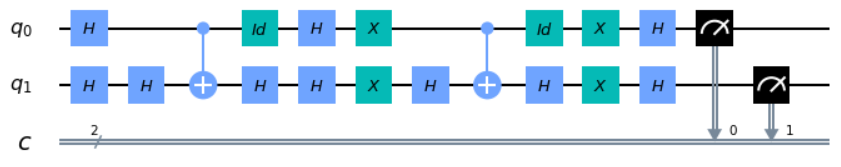

まずは、初期状態をセットします。

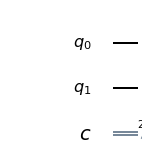

In [3]:
grover11=QuantumCircuit(2,2)
grover11.draw(output='mpl')

次に、両方にアダマールゲートを掛けて、重ね合わせの状態を作りましょう。以下のように、2つの量子ビットそれぞれにアダマールゲートを掛けてみましょう。これによって、得られる全ての可能性を同時に計算することができるようになります。
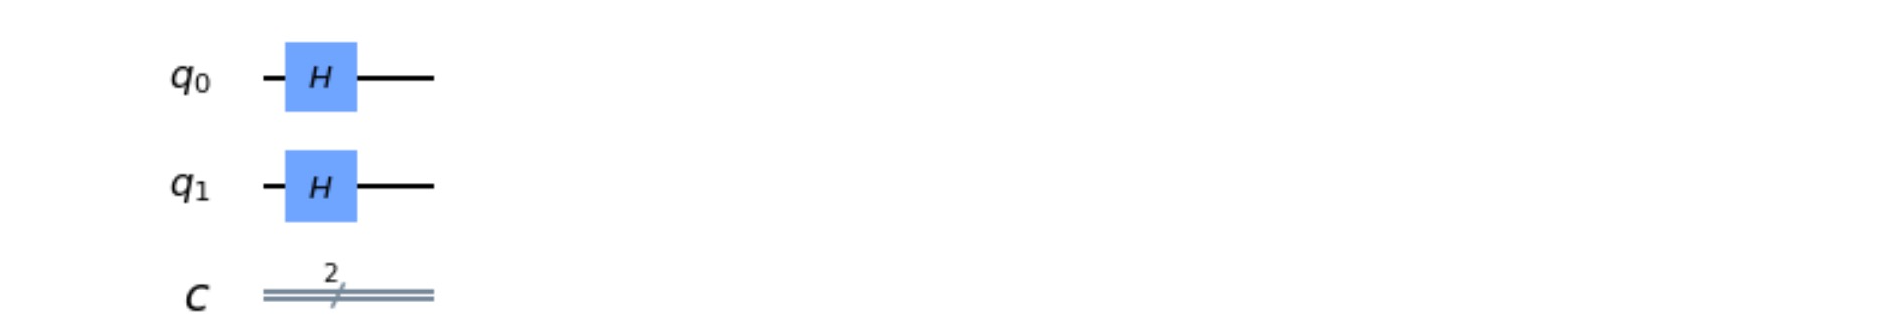

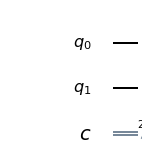

In [4]:
# 問題-1 上の回路図を作ってください。

grover11.draw(output='mpl')

目的とする形ができましたか？もう少し補足すると、これは、各々の状態が25%で均等に測定される状態になっています。
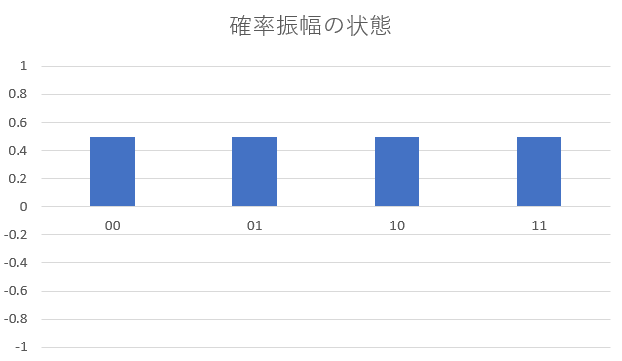

では、次の部分を作りましょう。
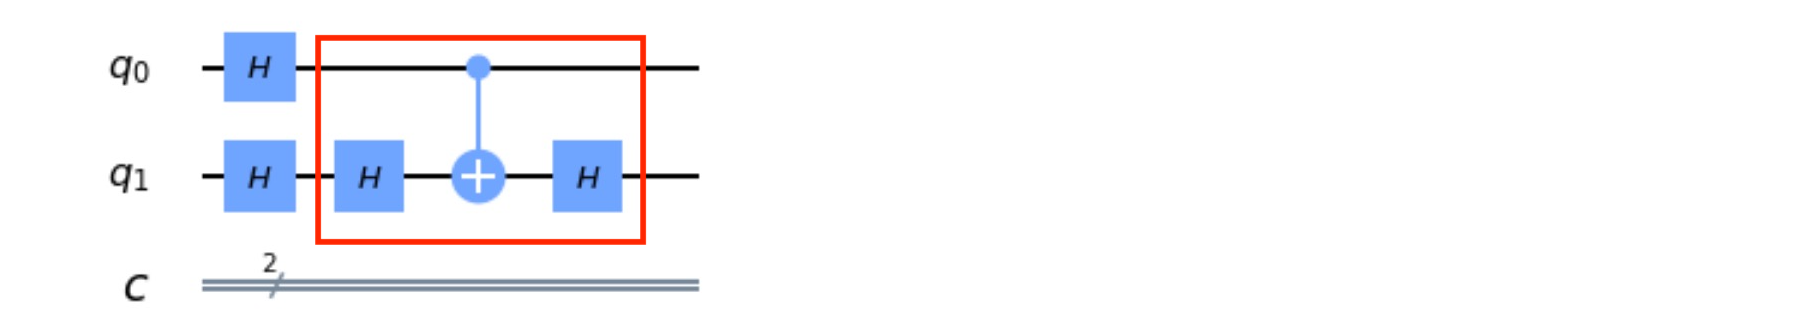

赤枠の部分を追加します。この部分は、制御Zゲートと呼ばれる構造になっています。コントール量子ビット（ここではq0）が1の状態の場合に、ターゲット量子ビットにZゲートを掛ける操作をします。Zゲートは、状態が$|1\rangle$の場合に自身の確率振幅の符号を逆にします。<br>
具体的には、この回路では、$|11\rangle$の符号だけが逆になります。<br>


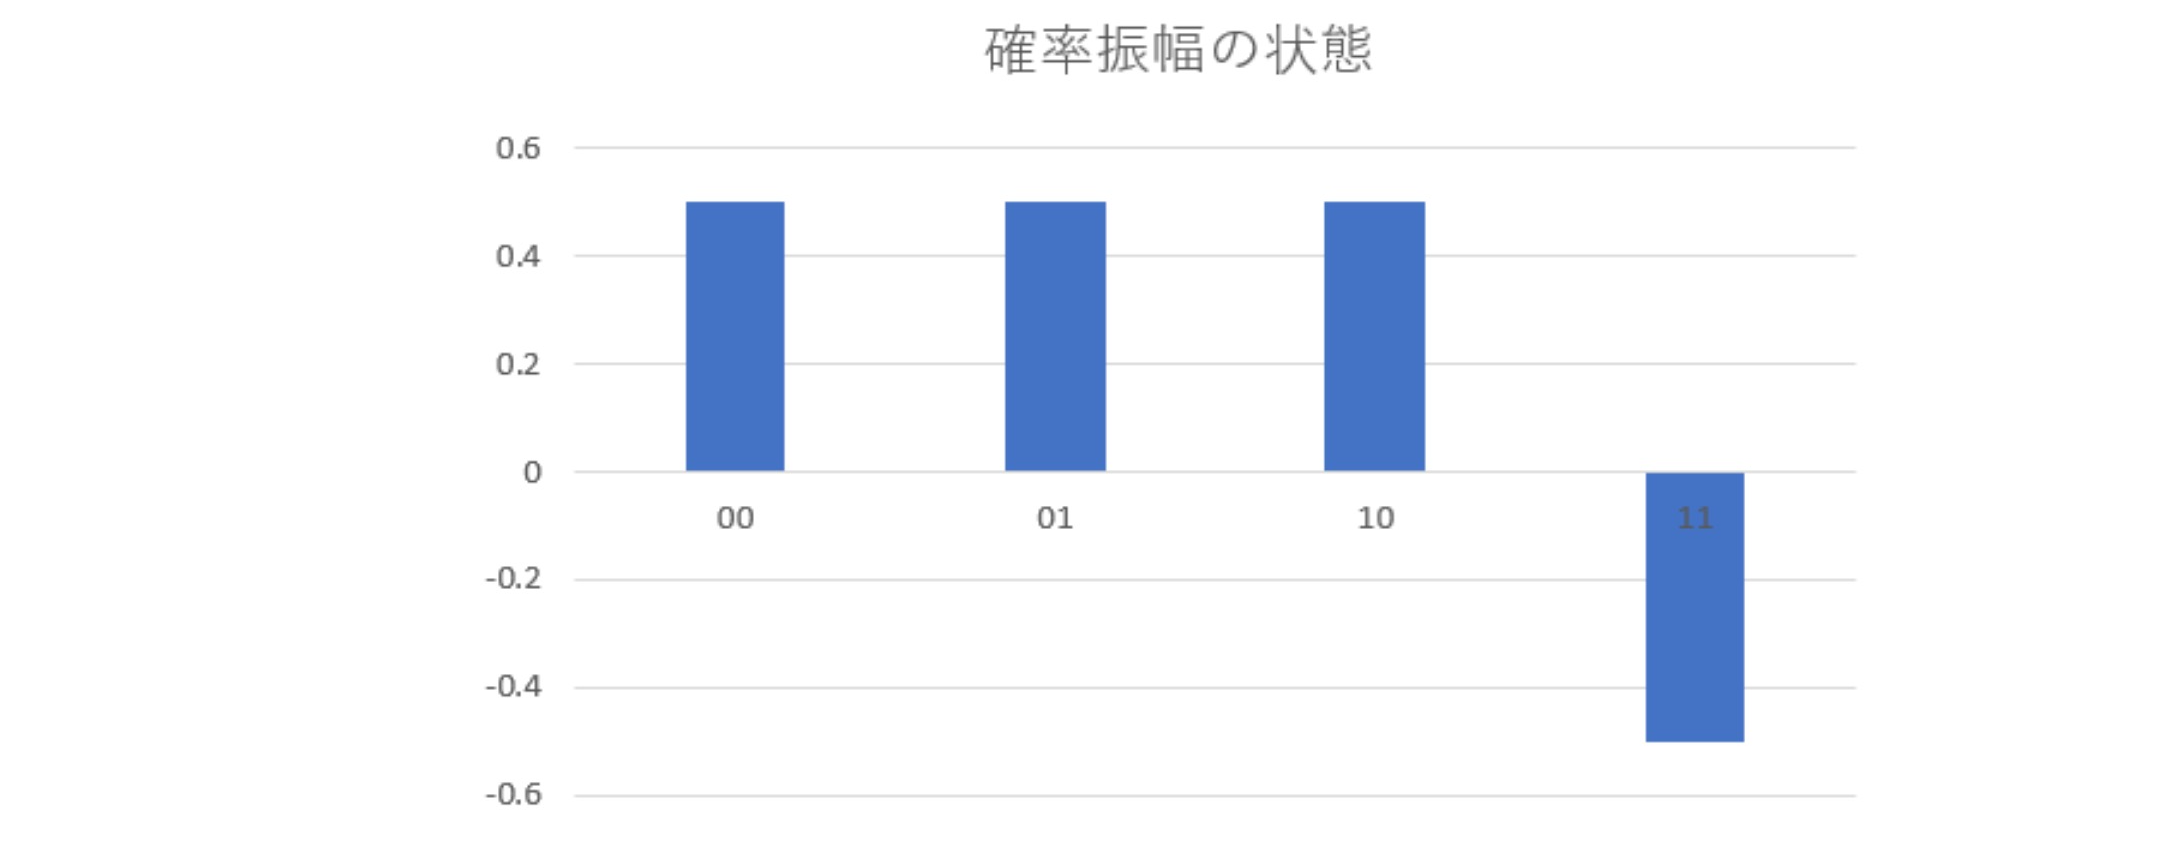
これは、マーキングという操作に相当します。これによって、$|11\rangle$の出現確率を上昇させる下準備をします。

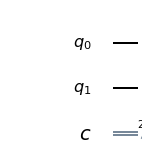

In [5]:
# 問題-2　上の回路図（問題-1に赤枠部分を追加したもの）を作ってください。

grover11.draw(output='mpl')

下準備ができましたら、次は確率振幅の平均を折り目にして、各確率振幅の位置を折り返す処理を記述します。
以下の赤枠の部分を追加しましょう。
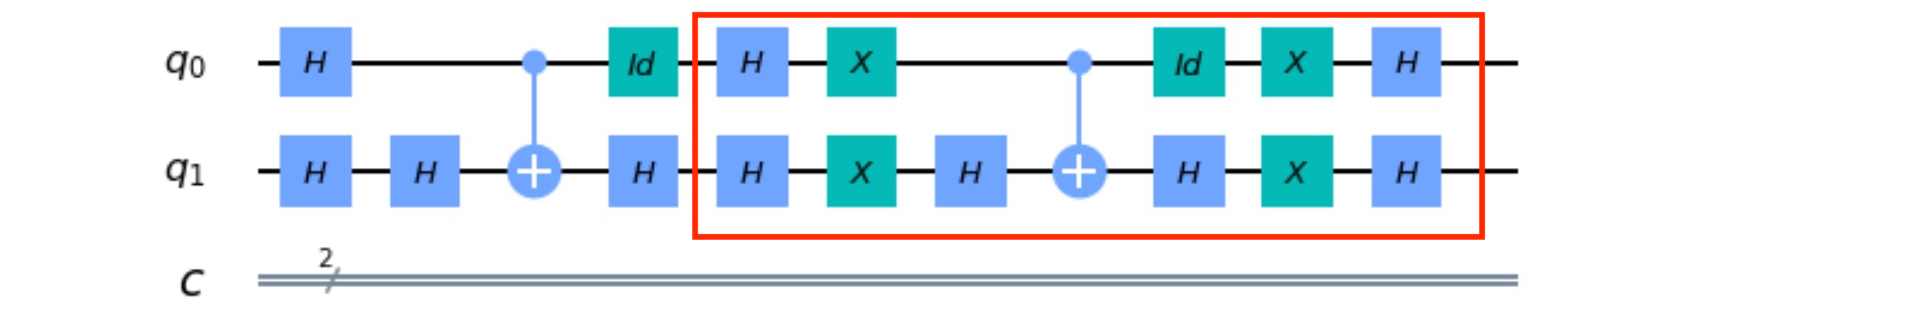

この回路が行っている処理のイメージは、次のように、マーキングした（符号を反転させた）状態の確率振幅を大きくし、それ以外を小さくするという操作になります。
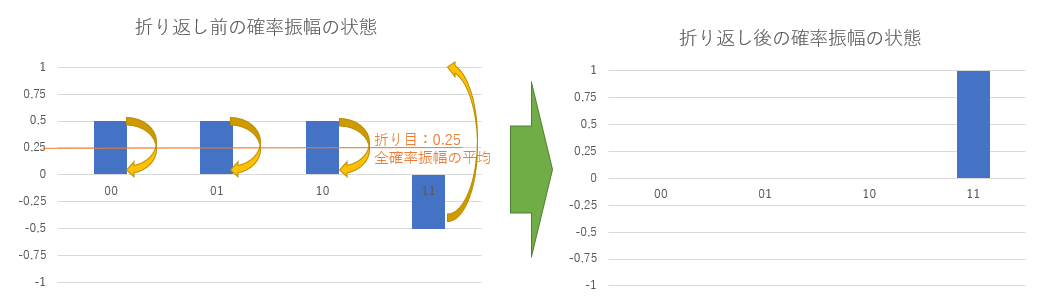

個々の詳細な処理にイメージは、次のURLに記載されていますので、ぜひ読んでみてください。<br>
https://www.ibm.com/developerworks/jp/cloud/library/cl-quantum-computing/index.html

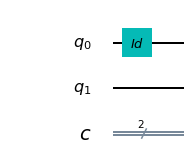

In [6]:
#問題-3 上の回路図（問題-2に赤枠部分を追加したもの）を作ってください。
grover11.iden(0) # 回路の見栄えを整えるために、恒等ゲートを差し込む。無くても動くが、表示の見栄えが崩れるのを防止するために、残しておく。

grover11.draw(output='mpl')

では、最後に測定ゲートを置きます。これによって、計算結果を読み出します。

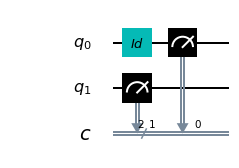

In [7]:
grover11.measure(0,0)
grover11.measure(1,1)
grover11.draw(output='mpl')

目標とする回路と一致しましたか？
では、計算を実行してみましょう。$|11\rangle$が1.00で出現していれば、目的を達成できています。

{'00': 1}


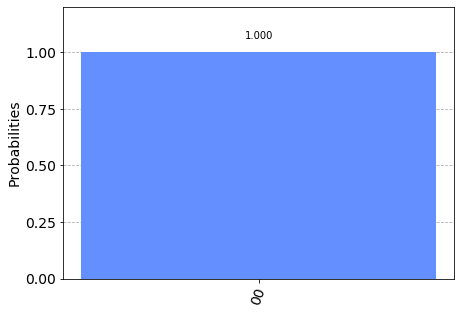

In [8]:
backend = Aer.get_backend('statevector_simulator') # 実行環境の定義
job = execute(grover11, backend) # 処理の実行
result = job.result() # 実行結果
counts = result.get_counts(grover11) # 実行結果の詳細を取り出し
print(counts)

from qiskit.visualization import *
plot_histogram(counts) # ヒストグラムで表示

いかがだったでしょうか。<br>
このハンズオンを通じて、Qiskitの使い方を学びました。
ここからは、Qiskitのチュートリアルを通じて、さらに学ぶことが可能です。ぜひ、トライしてみてください。
https://github.com/Qiskit/qiskit-iqx-tutorials

また、グローバーのアルゴリズムについては、昨年実施されたバーチャルハッカソン[IBM Quantum Challenge](https://quantumchallenge19.com/ja/)のWeek2〜4に実用的な例が掲載されています。こちらも合わせてご覧ください。